Análisis exploratorio de datos sobre siniestros viales en CABA

In [113]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import warnings
warnings.simplefilter('ignore')

1. Hechos

1.1 Importación y primera exploración de los datos

In [114]:
#Se importa del archivo excel homicidios.xlsx la página HECHOS y se guarda en un DataFrame
df_HECHOS = pd.read_excel('homicidios.xlsx',sheet_name='HECHOS')

In [115]:
#Se imprimen las primeras líneas del DataFrame para corroborar que la exportación sucediera de manera adecuada
df_HECHOS.head(2)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS


In [116]:
#Se imprimen y verifica si el tipo de dato es adecuado para la información en la columna. 
df_HECHOS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

Basado en la información impresa, se concluye que pos x, pos y y HH no corresponden al tipo de dato que contiene la columna. Esto se corregirá durante la transformación de los datos.

1.2 Revisión de valores nulos

In [117]:
#Se cuenta e imprime el número de valores nulos que hay en cada columna.
valores_faltantes = df_HECHOS.isna().sum()
print(valores_faltantes)


ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64


Al imprimir el conteo de los valores nulos distinguimos tres tipos de columna con estrategias distintas para su procesamiento. Primero, se va a eliminar la columna Altura por su alta cantidad de valores valtantes. Segundo, se eliminará el valor faltante en la columna Calle. Finalmente, para los valores de faltantes de Cruce y Dirección Normalizada se va a imputar el valor SD (Sin Dato).

In [118]:
#Se elimina Altura junto a 'XY (CABA)' y 'HORA' porque no se van a utilizar durante el análisis.
df_HECHOS=df_HECHOS.drop(columns=['Altura','XY (CABA)','HORA'])
#Se elimina el valor faltante de Calle
df_HECHOS = df_HECHOS.dropna(subset=['Calle'])
#Se imputa el valor SD en las filas de Cruce con valores nulos
df_HECHOS['Cruce']=df_HECHOS['Cruce'].fillna('SD')
#Se imputa el valor SD en las filas de Dirección Normalizada con valores nulos
df_HECHOS['Dirección Normalizada']=df_HECHOS['Dirección Normalizada'].fillna('SD')

1.3 Revisión y transformación del tipo de dato

En la primera exploración de los datos se indentificó a HH, Pos Y y Pos X como columnas en que el tipo de dato no corresponde con la información. Para convertir estas columnas a numerico, sin embargo, hace falta transformar los valores SD en un valor numérico.

In [119]:
#Se convierten todas las columnas a String para hacer transformaciones.
df_HECHOS = df_HECHOS.astype(str)

# Se remplaza SD con un valor vacío
df_HECHOS['HH'] = df_HECHOS['HH'].replace('SD', '')
# Se llenan los valores vacíos con 0
df_HECHOS['HH'] = df_HECHOS['HH'].fillna(0)

# Se remplaza . con un valor vacío
df_HECHOS['pos x'] = df_HECHOS['pos x'].replace('.', '')
# Se llenan los valores vacíos con 0
df_HECHOS['pos x'] = df_HECHOS['pos x'].fillna(0)

# Se remplaza . con un valor vacío
df_HECHOS['pos y'] = df_HECHOS['pos y'].replace('.', '')
# Se llenan los valores vacíos con 0
df_HECHOS['pos y'] = df_HECHOS['pos y'].fillna(0)

#Se convierte las columnas a un dato de tipo numérico.
df_HECHOS['HH'] = pd.to_numeric(df_HECHOS['HH'], errors='coerce').fillna(0)
df_HECHOS['pos x'] = pd.to_numeric(df_HECHOS['pos x'], errors='coerce').fillna(0)
df_HECHOS['pos y'] = pd.to_numeric(df_HECHOS['pos y'], errors='coerce').fillna(0)

1.4 Revisión de duplicados

Encontramos que este DataFrame no tiene filas duplicadas.

In [120]:
#Se guardan las filas duplicadas en la variable
duplicados = df_HECHOS[df_HECHOS.duplicated(keep=False)]

#Se imprimen las filas duplicadas.
print(duplicados)


Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Cruce, Dirección Normalizada, COMUNA, pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO]
Index: []


1.5 Visualización y análisis de cada variable en el DataFrame

1.5.1 Variables categóricas

682


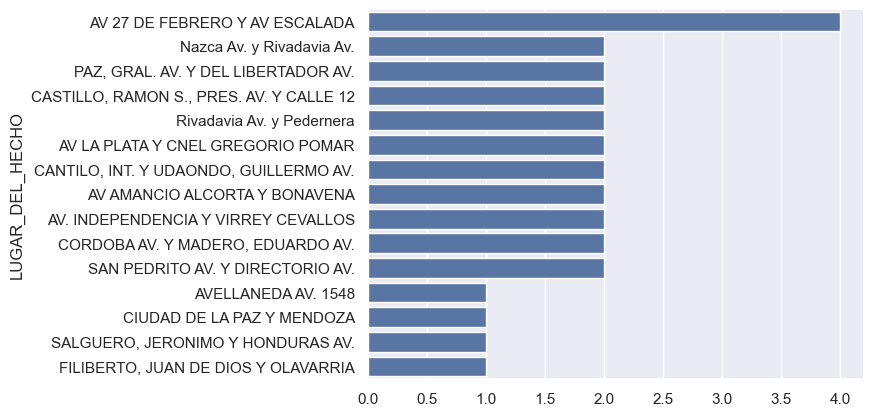

In [121]:
#Se imprimen la cantidad de valores únicas para LUGAR_DEL_HECHO
print(len(df_HECHOS['LUGAR_DEL_HECHO'].unique()))
#Se seleccionan los 15 valores que más se repiten en LUGAR_DEL_HECHO
LUGAR_DEL_HECHO_top_15 = df_HECHOS['LUGAR_DEL_HECHO'].value_counts().head(15)

# Se crea un gráfico de barras
ax = sns.barplot(x=LUGAR_DEL_HECHO_top_15.values, y=LUGAR_DEL_HECHO_top_15.index, orient='y')

# Se imprime la gráfica
plt.show()


Al examinar la frecuencia de cada calle, encontramos que solo las primeras 11 filas de LUGAR_DEL_HECHO_top_15 se repiten. El resto de los 683 valores solo aparecen una vez. También el único lugar que se repite más de dos veces (y por lo tanto sería el lugar en que más choques suceden) es AV 27 DE FREBRERO Y AV ESCALADA. También es clave resaltar solamente se repiten cruces entre calles.

4
TIPO_DE_CALLE
AVENIDA      429
CALLE        135
AUTOPISTA     66
GRAL PAZ      65
Name: count, dtype: int64


<Axes: xlabel='TIPO_DE_CALLE', ylabel='count'>

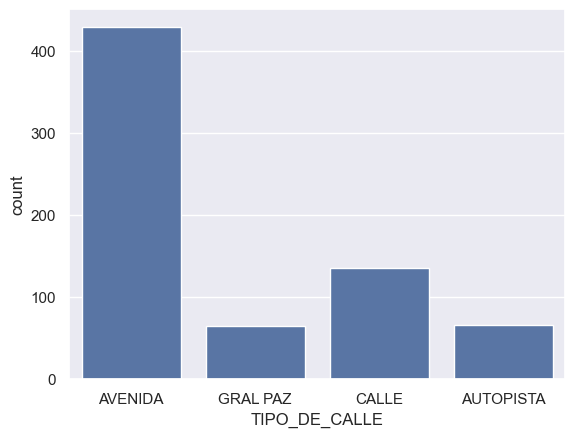

In [122]:
#Se imprimen la cantidad de valores únicas para TIPO_DE_CALLE
print(len(df_HECHOS['TIPO_DE_CALLE'].unique()))
#Se imprime la frecuencia de cada una de las categorías
print(df_HECHOS['TIPO_DE_CALLE'].value_counts())
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 
sns.countplot(data=df_HECHOS, x='TIPO_DE_CALLE')

Al examinar la gráfica de la frecuencia de accidentes según el tipo de calle, se encuentra que el tipo de calle en que más suceden accidentes es en avenidas. A pesar de ser una autopista, General Paz recibe su propia categoría que es casi tan frecuente como todas las otras autopistas juntas. Esto sugiere que hay factores que contribuyen a un mayor riesgo de accidentes mortales en las avenidas, como la mayor velocidad del tráfico, la mayor densidad de vehículos y la presencia de intersecciones complejas.

279
Calle
PAZ, GRAL. AV.                                57
RIVADAVIA AV.                                 19
DEL LIBERTADOR AV.                            18
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
                                              ..
PILCOMAYO                                      1
CERVANTES                                      1
CONGRESO AV.                                   1
AUSTRALIA AV.                                  1
PADRE CARLOS MUJICA                            1
Name: count, Length: 279, dtype: int64


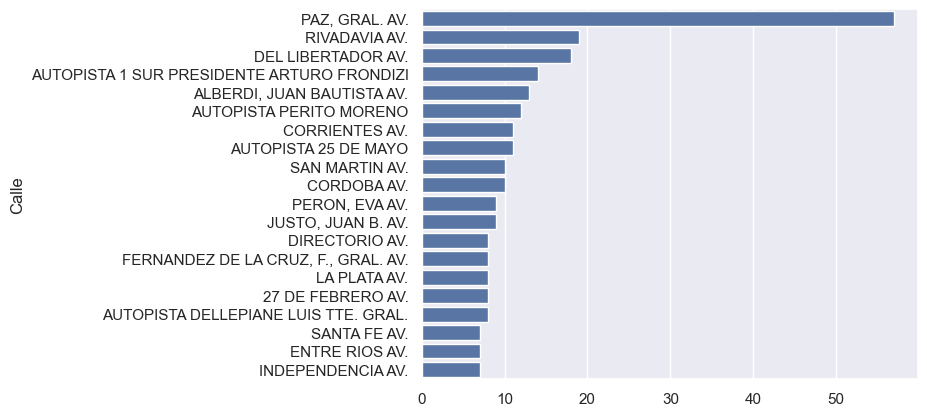

In [123]:
#Se imprimen la cantidad de valores únicas para Calle
print(len(df_HECHOS['Calle'].unique()))
#Se imprime la frecuencia de cada una de las calles
print(df_HECHOS['Calle'].value_counts())
#Se seleccionan los 20 valores que más se repiten en LUGAR_DEL_HECHO
Calle_top_20 = df_HECHOS['Calle'].value_counts().head(20)
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 
ax = sns.barplot(x=Calle_top_20.values, y=Calle_top_20.index, orient='h')
# Se imprime la gráfica
plt.show()


En esta gráfica se evidencia que la avenida con mayor cantidad de accidentes morales es AV. General Paz con 57 accidentes. Esta casi triplica la cantidad de accidentes muertos respecto a la siguiente calle con mayor número de accidentes (Av. RIVADAVIA). 

16
COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      1
Name: count, dtype: int64


<Axes: xlabel='COMUNA', ylabel='count'>

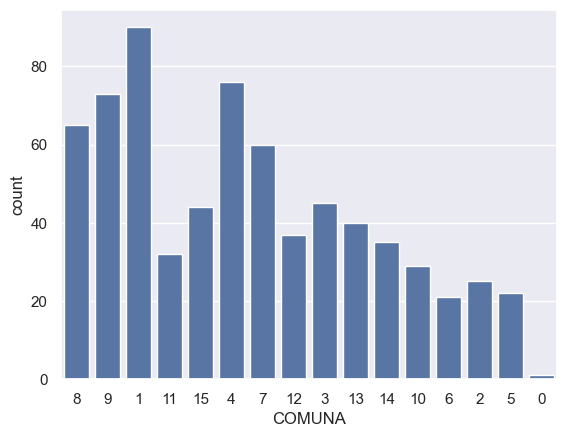

In [155]:
#Se imprimen la cantidad de valores únicas para COMUNA
print(len(df_HECHOS['COMUNA'].unique()))
#Se imprime la frecuencia de cada una de las COMUNA
print(df_HECHOS['COMUNA'].value_counts())
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 
sns.countplot(data=df_HECHOS, x='COMUNA')

La gráfica muestra el número de accidentes mortales en cada comuna de Buenos Aires. La comuna con mayor número de accidentes mortales es la 1, con un total de 90 accidentes. La comuna con menor número de accidentes mortales es la 0, con un solo 1 accidente. La gráfica muestra que hay una gran disparidad en el número de accidentes mortales en las diferentes comunas de Buenos Aires. Algunas comunas tienen un número muy alto de accidentes mortales, mientras que otras tienen un número muy bajo. Esto sugiere que hay factores que contribuyen a un mayor riesgo de accidentes mortales en algunas comunas, como la densidad de población, la infraestructura vial y la presencia de comportamientos de conducción riesgosos.

10
VICTIMA
MOTO           295
PEATON         263
AUTO            83
BICICLETA       29
SD               9
CARGAS           7
PASAJEROS        5
MOVIL            2
OBJETO FIJO      1
PEATON_MOTO      1
Name: count, dtype: int64


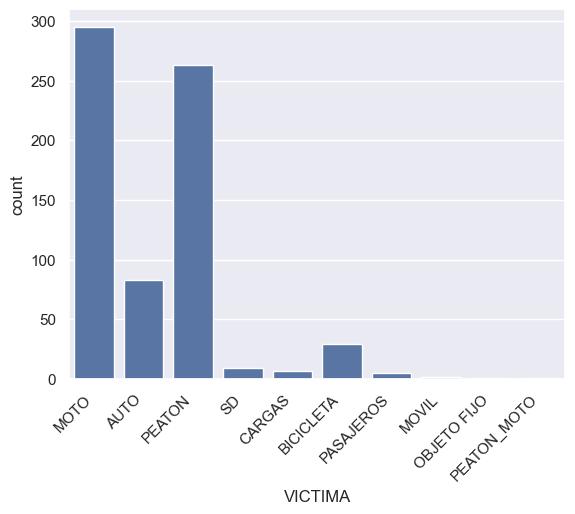

In [159]:
#Se imprimen la cantidad de valores únicas para VICTIMA

print(len(df_HECHOS['VICTIMA'].unique()))
#Se imprime la frecuencia de cada una de las VICTIMA

print(df_HECHOS['VICTIMA'].value_counts())
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 

ax = sns.countplot(x="VICTIMA", data=df_HECHOS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

La gráfica muestra el número de accidentes mortales según el tipo de transporte de la victima. Vemos que la mortalidad de los accidentes afecta de manera desproporcionada a las motos y peatones. El factor común entre estas dos categorías es que ninguna de las dos cuenta con carrosería u otras formas de protección en contra de la fuerza del golpe. De esta manera, cuando hay un choque tanto las motos como los peatones tienen una mortalidad alta porque a causa de su desprotección.

1.5.2 Variables numéricas

count     695
unique      3
top         1
freq      675
Name: N_VICTIMAS, dtype: object


<Axes: xlabel='N_VICTIMAS'>

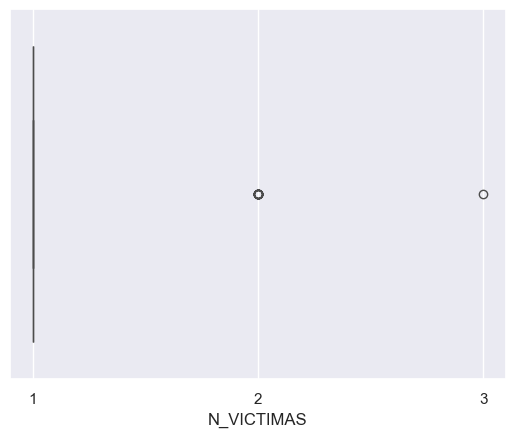

In [162]:
# Se utiliza .describe(), para hacer un resumen estadístico de N_VICTIMAS
print(df_HECHOS['N_VICTIMAS'].describe())#Comentar que hay dos valores que son outliers, pero que solo lo son por la distribución de los datos. En ese caso es mejor dejarlos.
#Se grafica un boxplot con la información de N_VICTIMAS
sns.boxplot(data=df_HECHOS,x='N_VICTIMAS')

En esta gráfica se muestra la distribución del número de victimas de los accidentes de tránsito mortales. Vemos que los accidentes mortales rara vez tienen más de una víctima. Tan es así que los accidentes con 2 o 3 victimas mortales son considerados como valores animales. No voy a eliminarlos, sin embargo, porque en estos accidentes podemos encontrar información reelevante para el análisis.

Variables temporales

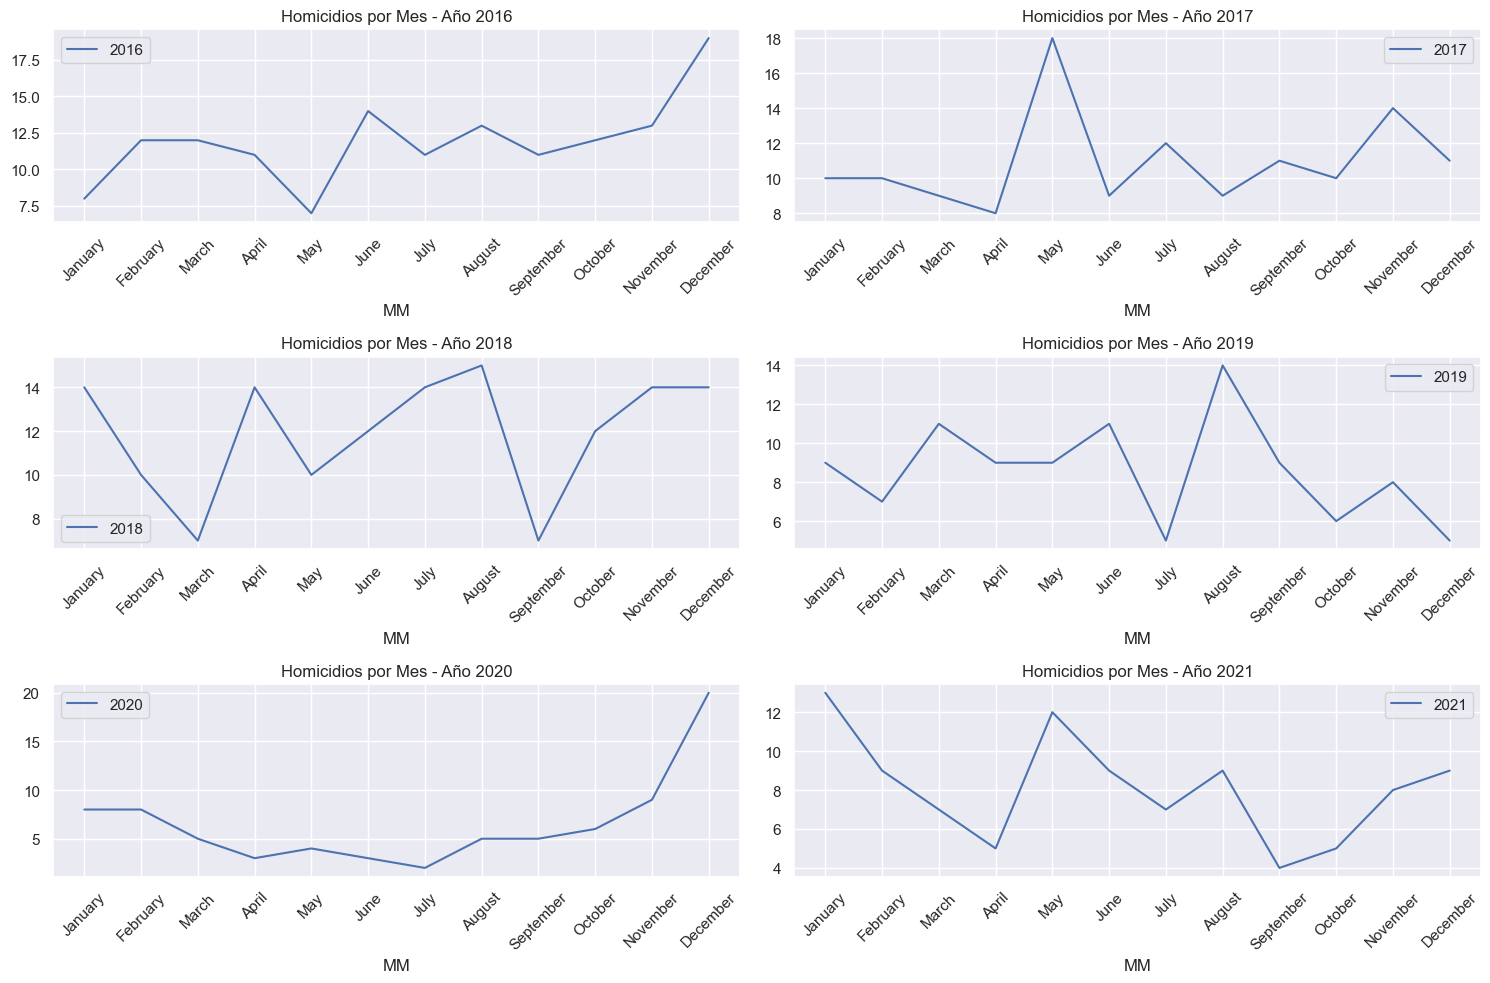

In [164]:
# Se convierte FECHA a tipo DateIme
df_HECHOS['FECHA'] = pd.to_datetime(df_HECHOS['FECHA'])

# Se obtienen los valores únicos en la columna de años
unique_years = df_HECHOS['AAAA'].unique()

# Se crean los subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Se itera a través de años
for i, year in enumerate(unique_years):
    # Se asigna la posición en el subplot
    row = i // 2
    col = i % 2

    # Se filtran los datos según el año
    df_year = df_HECHOS[df_HECHOS['AAAA'] == year]

    # Se cuentan los accidentes mortales según el mes
    count_by_month = df_year.groupby('MM').size()

    # Se crea un gráfico de línea
    sns.lineplot(x=count_by_month.index, y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Se crea una lista con los nombres de los meses
    month_labels = [calendar.month_name[m] for m in count_by_month.index.tolist()]

    # Se asignan los títulos
    axes[row, col].set_xticks(count_by_month.index)  # Set x-axis tick positions
    axes[row, col].set_xticklabels(month_labels, rotation=45)  # Set month names as labels
    axes[row, col].set_title(f'Homicidios por Mes - Año {year}')

# Se onfiguran las etiquetas en el eje x para el último subgráfico
axes[-1, 0].set_xlabel('MM')
axes[-1, 1].set_xlabel('MM')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

Las gráficas proporcionadas muestran el número de homicidios registrados en cada mes de los años 2016 a 2021. No se identifica un patrón consistente de homicidios mes a mes a lo largo de diferentes años y los meses con mayor número de homicidios varían de un año a otro. En términos generales, no existe un patrón definido en la cantidad de homicidios registrados cada mes a lo largo de los años analizados. Si bien el mes con mayor número de homicidios varía de un año a otro, se observa una disminución significativa en la cantidad de casos a partir de diciembre de 2019 hasta noviembre de 2020. Esta reducción coincide con el período de cuarentena implementado como medida de control durante la pandemia de COVID-19. A partir de junio de 2021, se evidencia un aumento gradual en el número de homicidios.

6
AAAA
2016    143
2018    143
2017    131
2019    103
2021     97
2020     78
Name: count, dtype: int64


<Axes: xlabel='AAAA', ylabel='count'>

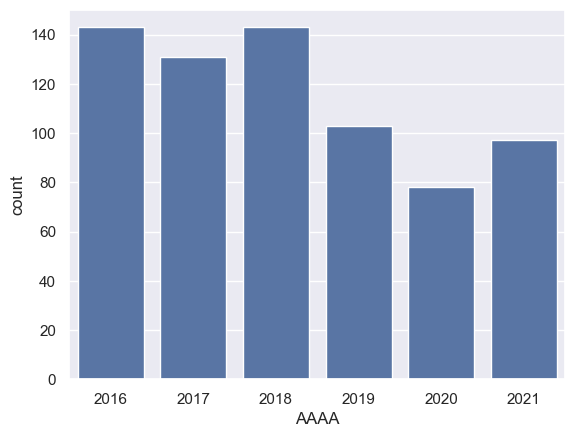

In [165]:
#Se imprimen la cantidad de valores únicas para AAAA
print(len(df_HECHOS['AAAA'].unique()))
#Se imprime la frecuencia de cada una de las VICTIMA
print(df_HECHOS['AAAA'].value_counts())
#Se grafica un gráfico de barras con la información de AAAA
sns.countplot(data=df_HECHOS, x='AAAA')

Al analizar el gráfico podemos ver que hay una tendencia a la baja en los accidentes. Una razón para esto puede ser el periodo de cuatentena en respuesta a la pandemia del COVID 19. Sin embargo, ya hay una tendencia a la baja en 2019. En 2021 hay un incremento en los accidentes respecto a 2020, sin embargo hace falta más información para determinar cuál es el comportamiento de los accidentes después de la pandemia.

279
MM
12    78
11    66
8     65
1     62
5     60
6     58
2     56
3     51
7     51
10    51
4     50
9     47
Name: count, dtype: int64


<Axes: xlabel='MM', ylabel='count'>

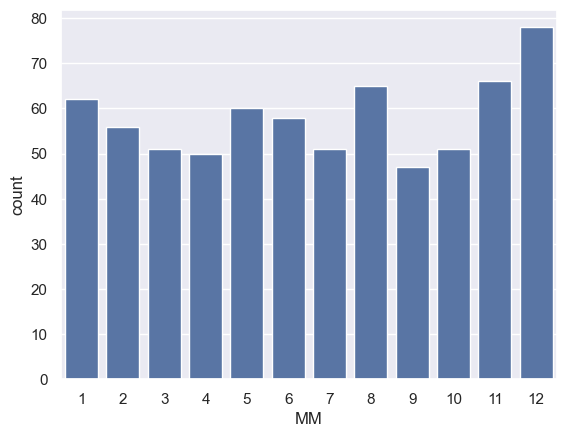

In [131]:
#Se imprimen la cantidad de valores únicas para MM
print(len(df_HECHOS['MM'].unique()))
#Se imprime la frecuencia de cada una de las MM
print(df_HECHOS['MM'].value_counts())
#Se grafica un gráfico de barras con la información de MM
sns.countplot(data=df_HECHOS, x='MM')

Los datos proporcionados muestran una variabilidad considerable en el número de accidentes a lo largo del año, sin un patrón estacional claro. El mes con mayor número de accidentes es Diciembre (mes 12) con 78 accidentes, mientras que el mes con menor número de accidentes es Abril (mes 4) con 50 accidentes. Se observa una variabilidad considerable en el número de accidentes a lo largo del año, con picos en diciembre y enero y valores más bajos en abril, mayo y junio.

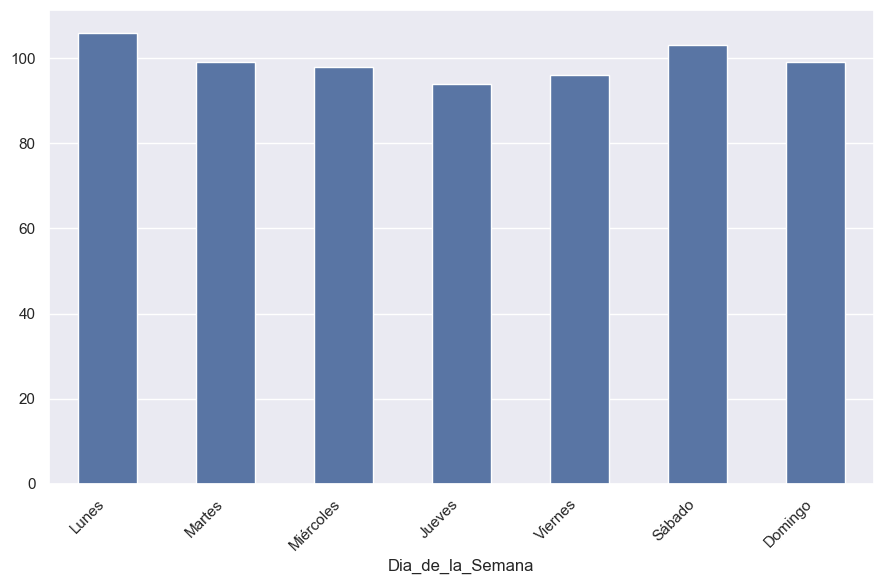

In [170]:
# Extraer el día de la semana en inglés
df_HECHOS['Dia_de_la_Semana'] = df_HECHOS['FECHA'].dt.day_name()

# Mapear los días de la semana del inglés al español
dias_en_espanol = {
    'Monday': 'Lunes',
    'Tuesday': 'Martes',
    'Wednesday': 'Miércoles',
    'Thursday': 'Jueves',
    'Friday': 'Viernes',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}
df_HECHOS['Dia_de_la_Semana'] = df_HECHOS['Dia_de_la_Semana'].map(dias_en_espanol)

# Contar los homicidios por día de la semana
dias_semana_counts = df_HECHOS['Dia_de_la_Semana'].value_counts()[list(dias_en_espanol.values())]

# Crear el gráfico
plt.figure(figsize=(9, 6))
ax = sns.barplot(x=dias_semana_counts.index, y=dias_semana_counts.values,width=0.5)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()


En esta gráfica se muestra el número de accidentes mortales según el día de la semana. En ella vemos que hay una varianza muy baja del numero de accidentes según el día de la semana. De esto podemos concluir que el día de la semana no es un factor determinante en la accidentalidad. 

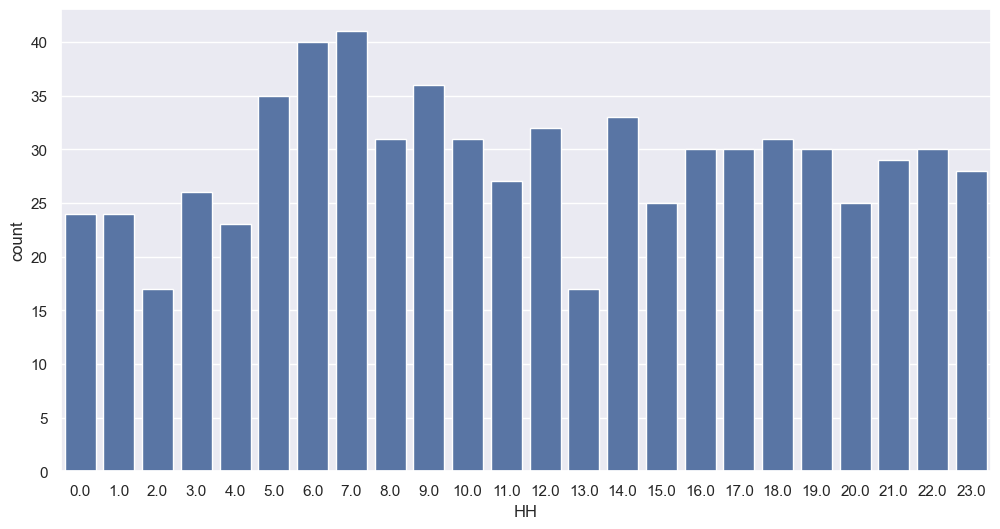

In [169]:
# Configura el tamaño de la figura para el gráfico. Un ancho de 12 pulgadas y una altura de 6 pulgadas proporcionan suficiente espacio para una clara visualización de los datos.
plt.figure(figsize=(12, 6))

# Utiliza seaborn para crear un gráfico de barras que muestra el conteo de accidentes por cada hora del día. La columna 'Hora entera' del DataFrame 'df_homicidios' se usa como eje X. La paleta de colores 'viridis' se utiliza para las barras.
ax = sns.countplot(x=df_HECHOS['HH'])

# Muestra el gráfico, lo cual es necesario para visualizarlo en entornos que no lo hacen automáticamente.
plt.show()


La gráfica muestra el número de accidentes mortales registrados en cada hora del día, desde la medianoche hasta las 11:00 p. m. Se observa una clara tendencia en forma de "U", con un pico en las horas centrales del día (entre las 3:00 p. m. y las 9:00 p. m.) y un número menor de accidentes en las horas de la madrugada y la noche. Las horas de mayor riesgo son en horas centrales, pues los datos indican que el riesgo de accidentes mortales es significativamente mayor durante las horas centrales del día, especialmente entre las 3:00 p. m. y las 9:00 p. m.

2. Victimas

2.1 Importación y primera exploración de los datos

In [172]:
#Se importa del archivo excel homicidios.xlsx la página VICTIMAS y se guarda en un DataFrame
df_VICTIMAS = pd.read_excel('homicidios.xlsx',sheet_name='VICTIMAS')

In [139]:
#Se imprimen las primeras líneas del DataFrame para corroborar que la exportación sucediera de manera adecuada
print(df_VICTIMAS.head(2))

    ID_hecho      FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
0  2016-0001 2016-01-01  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19   
1  2016-0002 2016-01-02  2016   1   2  CONDUCTOR    AUTO  MASCULINO   70   

   FECHA_FALLECIMIENTO  
0  2016-01-01 00:00:00  
1  2016-01-02 00:00:00  


In [140]:
#Se imprimen y verifica si el tipo de dato es adecuado para la información en la columna. 
print(df_VICTIMAS.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB
None


Basado en la información impresa, se concluye que las columnas corresponden al tipo de dato adecuado para la inforamción que contienen. El único caso en que no es así es FECHA_FALLECIMIENTO, pero esa columna no va a ser utilizada para el análisis.

2.2 Revisión de valores nulos

In [173]:
#Se elimina FECHA_FALLECIMIENTO
df_VICTIMAS.drop(columns='FECHA_FALLECIMIENTO', inplace=True)
#Se cuenta e imprime el número de valores nulos que hay en cada columna.
valores_faltantes = df_VICTIMAS.isna().sum()
print(valores_faltantes)

ID_hecho    0
FECHA       0
AAAA        0
MM          0
DD          0
ROL         0
VICTIMA     0
SEXO        0
EDAD        0
dtype: int64


Vemos que no hay valores faltantes

1.3 Revisión de duplicados

Encontramos que este DataFrame no tiene filas duplicadas.

In [143]:
#Se guardan las filas duplicadas en la variable
Duplicados=df_VICTIMAS[df_VICTIMAS.duplicated(keep=False)]
#Se imprimen las filas duplicadas.
print(Duplicados)

Empty DataFrame
Columns: [ID_hecho, FECHA, AAAA, MM, DD, ROL, VICTIMA, SEXO, EDAD]
Index: []


2.4 Visualización y análisis de cada variable en el DataFrame


Se omitió el análisis de las variables que se comparten con la tabla de Hechos para evitar redundancias en el análisis.

2.4.1 Variables categóricas

5
ROL
CONDUCTOR               330
PEATON                  267
PASAJERO_ACOMPAÑANTE     80
CICLISTA                 29
SD                       11
Name: count, dtype: int64


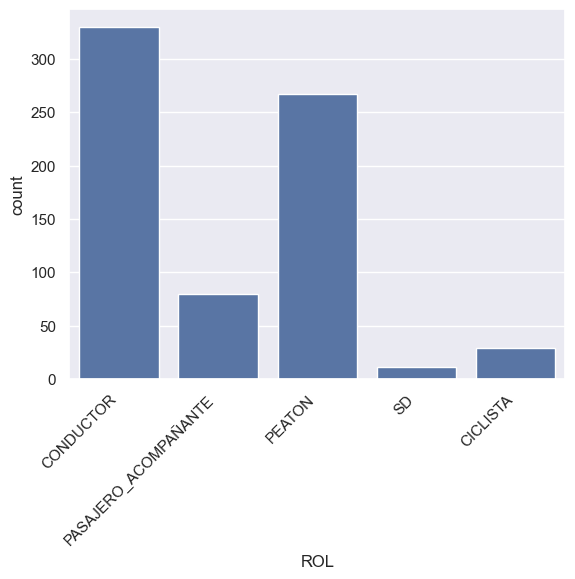

In [174]:
#Se imprimen la cantidad de valores únicas para ROL
print(len(df_VICTIMAS['ROL'].unique()))
#Se imprime la frecuencia de cada una de las categorías
print(df_VICTIMAS['ROL'].value_counts())
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 
ax = sns.countplot(x="ROL", data=df_VICTIMAS)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

La gráfica de barras presenta la distribución de accidentes mortales según el rol que desempeñaba la víctima en el momento del accidente. La categoría con mayor número de accidentes mortales es la de conductores, con 330 casos, lo que representa aproximadamente el 59.6% del total. Los peatones ocupan el segundo lugar con 267 accidentes mortales, equivalentes al 48.5% del total.

3
SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


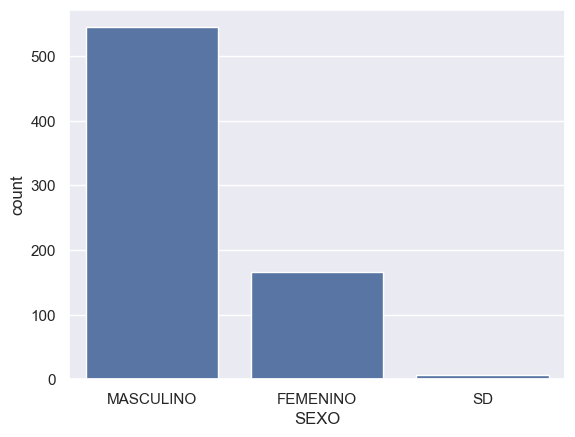

In [175]:
#Se imprimen la cantidad de valores únicas para SEXO
print(len(df_VICTIMAS['SEXO'].unique()))
#Se imprime la frecuencia de cada una de las categorías
print(df_VICTIMAS['SEXO'].value_counts())
#Se gráfica en un gráfico de barras la frecuencia de las categorías. 
sns.countplot(data=df_VICTIMAS, x='SEXO')
plt.show()

La distribución de datos por sexo muestra una clara disparidad, con 545 personas identificándose como masculinas (78.2%), 166 como femeninas (23.8%) y 6 en la categoría "SD" (0.9%).

2.4.2 Variables numéricas

count    717.000000
mean      41.267782
std       19.306213
min        1.000000
25%       28.000000
50%       35.000000
75%       55.000000
max       95.000000
Name: EDAD, dtype: float64


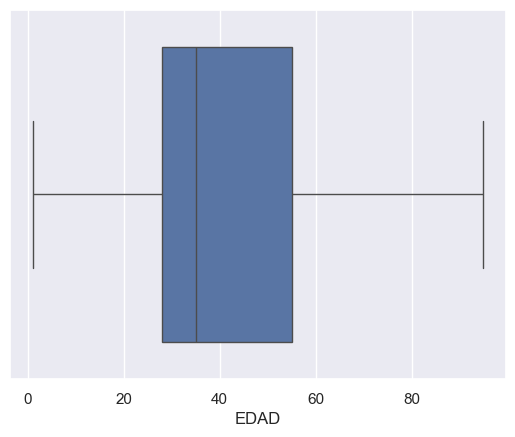

In [152]:
# Se reemplaz los valores sin datos con la moda de la edad de las victimas de accidentes mortales.
mode_value = df_VICTIMAS['EDAD'][df_VICTIMAS['EDAD'] != 'SD'].mode()[0]
df_VICTIMAS['EDAD'] = df_VICTIMAS['EDAD'].replace('SD', mode_value)

# Se convierte EDAD a un valor numérico
df_VICTIMAS['EDAD'] = pd.to_numeric(df_VICTIMAS['EDAD'])

# Se utiliza describe para tener un resumen estadístico de los datos.
print(df_VICTIMAS['EDAD'].describe())

# Se hace un gráfico de cajas
sns.boxplot(data=df_VICTIMAS, x='EDAD')
plt.show()


El diagrama de caja muestra la distribución de la variable EDAD (edad) para las víctimas de accidentes mortales. La edad media de las víctimas es de 41,27 años, y se encuentran en un rango entre 1 año y los 95. La mediana de edad (Q2) es de 35 años, lo que significa que el 50% de las víctimas son menores de 35 años y el 50% son mayores de 35 años.

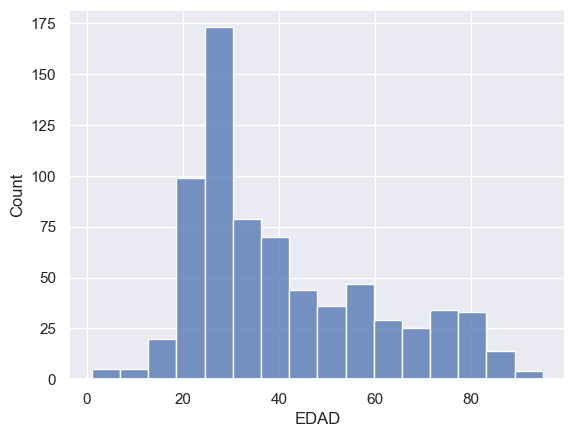

In [180]:
# Se reemplaz los valores sin datos con la moda de la edad de las victimas de accidentes mortales.
mode_value = df_VICTIMAS['EDAD'][df_VICTIMAS['EDAD'] != 'SD'].mode()[0]
df_VICTIMAS['EDAD'] = df_VICTIMAS['EDAD'].replace('SD', mode_value)

# Se convierte EDAD a un valor numérico
df_VICTIMAS['EDAD'] = pd.to_numeric(df_VICTIMAS['EDAD'])
#Se grafica un histograma
sns.histplot(data=df_VICTIMAS, x='EDAD')
plt.show()

El histograma muestra la distribución de la edad de las víctimas de accidentes mortales en intervalos de 5 años. Las barras más altas se observan en el intervalo de 30 a 34 años, lo que indica que este es el grupo de edad con mayor número de víctimas. Las barras van disminuyendo gradualmente en las categorías de edad más jóvenes y más mayores. Si bien la distribución de la edad es relativamente uniforme, existen algunos casos excepcionales con edades muy jóvenes o muy avanzadas.

3. Exportación de los datasets

In [153]:
df_VICTIMAS.to_csv('Homicidios_Victimas.csv',sep=',')

In [154]:
df_HECHOS.to_csv('Homicidios_Hechos.csv',sep=',')